<a href="https://colab.research.google.com/github/DorZaneti/Predicting_Fuel_Efficiency/blob/main/Predicting_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The basic architecture :**
## The values of the hyper-parameters:
### Hidden units = [8,4]
### Output size = 1
### Activation function =ReLU
### Learning rate = 0.001
### Loss function = MSELoss
### Optimizer = SGD
### Batch size = 8
### Number of epoch = 200

### Test MSE: 9.6133
### Test MAE: 2.1211

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from IPython.display import Image

### Working with feature columns



In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

print(df.shape)
df.tail()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
print(df.isna().sum())

df = df.dropna()
df = df.reset_index(drop=True)
print(df.shape)
df.tail()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
(392, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8, random_state=1)

df_new_train, df_val = sklearn.model_selection.train_test_split(df_train, train_size=0.85, random_state=1)

train_stats = df_train.describe().transpose()
print(train_stats)
print('\n')
val_stats = df_val.describe().transpose()
print(val_stats)

              count         mean         std     min     25%     50%     75%  \
MPG           313.0    23.404153    7.666909     9.0    17.5    23.0    29.0   
Cylinders     313.0     5.402556    1.701506     3.0     4.0     4.0     8.0   
Displacement  313.0   189.512780  102.675646    68.0   104.0   140.0   260.0   
Horsepower    313.0   102.929712   37.919046    46.0    75.0    92.0   120.0   
Weight        313.0  2961.198083  848.602146  1613.0  2219.0  2755.0  3574.0   
Acceleration  313.0    15.704473    2.725399     8.5    14.0    15.5    17.3   
Model Year    313.0    75.929712    3.675305    70.0    73.0    76.0    79.0   
Origin        313.0     1.591054    0.807923     1.0     1.0     1.0     2.0   

                 max  
MPG             46.6  
Cylinders        8.0  
Displacement   455.0  
Horsepower     230.0  
Weight        5140.0  
Acceleration    24.8  
Model Year      82.0  
Origin           3.0  


              count         mean         std     min     25%     50%  

In [ ]:
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_train_norm, df_test_norm, df_val_norm = df_train.copy(), df_test.copy(), df_val.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
    df_val_norm.loc[:, col_name] = (df_val_norm.loc[:, col_name] - mean)/std

print(df_train_norm.tail())
print('\n')
print(df_val_norm.tail())

      MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
203  28.0  -0.824303     -0.901020   -0.736562 -0.950031      0.255202   
255  19.4   0.351127      0.413800   -0.340982  0.293190      0.548737   
72   13.0   1.526556      1.144256    0.713897  1.339617     -0.625403   
235  30.5  -0.824303     -0.891280   -1.053025 -1.072585      0.475353   
37   14.0   1.526556      1.563051    1.636916  1.470420     -1.359240   

     Model Year  Origin  
203          76       3  
255          78       1  
72           72       1  
235          77       1  
37           71       1  


      MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
212  13.0   1.526556      1.095559    0.713897  1.070940     -0.258484   
76   22.0  -0.824303     -0.667274   -0.710190 -0.530517      0.842272   
390  28.0  -0.824303     -0.677013   -0.631074 -0.396179      1.062423   
34   17.0   0.351127      0.589110   -0.077262  0.433421     -0.075025   
154  16.0   1.526556      2

In [ ]:
boundaries = torch.tensor([73, 76, 79])

v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_val_norm['Model Year'].values)
df_val_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

numeric_column_names.append('Model Year Bucketed')

In [ ]:
from torch.nn.functional import one_hot


total_origin = len(set(df_train_norm['Origin']))

origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values) % total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

origin_encoded = one_hot(torch.from_numpy(df_val_norm['Origin'].values) % total_origin)
x_val_numeric = torch.tensor(df_val_norm[numeric_column_names].values)
x_val = torch.cat([x_val_numeric, origin_encoded], 1).float()


In [ ]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()
y_val = torch.tensor(df_val_norm['MPG'].values).float()

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_ds = TensorDataset(x_val, y_val)
val_dl = DataLoader(val_ds, batch_size=batch_size)


In [ ]:
hidden_units = [8, 4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

modelBasic = nn.Sequential(*all_layers)

modelBasic

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(modelBasic.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelBasic(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')


Epoch 0  Loss 536.1047
Epoch 20  Loss 8.4361
Epoch 40  Loss 7.8695
Epoch 60  Loss 7.1891
Epoch 80  Loss 6.7062
Epoch 100  Loss 6.7599
Epoch 120  Loss 6.3124
Epoch 140  Loss 6.6864
Epoch 160  Loss 6.7648
Epoch 180  Loss 6.2156


In [ ]:
with torch.no_grad():
    pred = modelBasic(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 9.6133
Test MAE: 2.1211


Epoch 0  Train Loss 6.1224  Train MAE 1.8768  Val Loss 5.1791  Val MAE 1.8934
Epoch 20  Train Loss 6.3367  Train MAE 1.8646  Val Loss 7.0633  Val MAE 2.0958
Epoch 40  Train Loss 5.8464  Train MAE 1.7879  Val Loss 3.5982  Val MAE 1.4587
Epoch 60  Train Loss 6.0432  Train MAE 1.8018  Val Loss 3.8501  Val MAE 1.5647
Epoch 80  Train Loss 5.9690  Train MAE 1.8562  Val Loss 3.7298  Val MAE 1.6381
Epoch 100  Train Loss 5.5801  Train MAE 1.7868  Val Loss 4.3573  Val MAE 1.6124
Epoch 120  Train Loss 5.4744  Train MAE 1.7308  Val Loss 3.2455  Val MAE 1.4949
Epoch 140  Train Loss 5.1992  Train MAE 1.6892  Val Loss 3.2852  Val MAE 1.4167
Epoch 160  Train Loss 5.2061  Train MAE 1.7737  Val Loss 3.4149  Val MAE 1.5555
Epoch 180  Train Loss 5.6592  Train MAE 1.7498  Val Loss 4.5775  Val MAE 1.7641


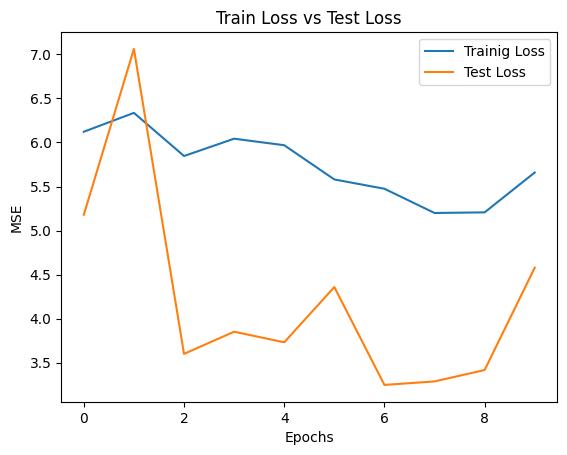

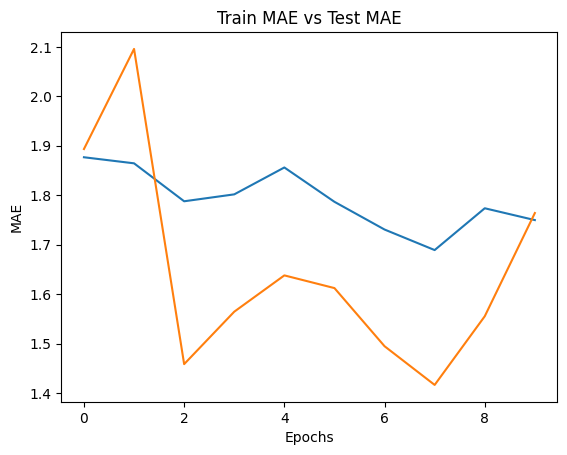

In [ ]:
import matplotlib.pyplot as plt

train_loss_hist = []
train_mae_hist = []
test_loss_hist = []
test_mae_hist = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    mae_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelBasic(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        mae = nn.L1Loss()(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
        mae_hist_train += mae.item()

    if epoch % log_epochs==0:
        train_loss = loss_hist_train/len(train_dl)
        train_mae = mae_hist_train/len(train_dl)
        test_pred = modelBasic(x_val.float())[:, 0]
        test_loss = loss_fn(test_pred, y_val).item()
        test_mae = nn.L1Loss()(test_pred, y_val).item()

        print(f'Epoch {epoch}  Train Loss {train_loss:.4f}  Train MAE {train_mae:.4f}  Val Loss {test_loss:.4f}  Val MAE {test_mae:.4f}')

        train_loss_hist.append(train_loss)
        train_mae_hist.append(train_mae)
        test_loss_hist.append(test_loss)
        test_mae_hist.append(test_mae)

plt.plot(train_loss_hist, label= 'Trainig Loss' )
plt.plot(test_loss_hist,label= 'Test Loss' )
plt.title('Train Loss vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(train_mae_hist, label = 'Train MAE')
plt.plot(test_mae_hist, label = 'Test MAE')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()



# **The first architecture :**
## The values of the hyper-parameters:
### Hidden units = [8,6,4]
### Output size = 1
### Activation function = Sigmiod
### Learning rate = 0.001
### Loss function = MSELoss
### Optimizer = SGD
### Batch size = 8
### Number of epoch = 300
### This architecture should be more precise because we add one more layer, we change the batch size to 16, and change the activation function to sigmoid.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(2)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_ds = TensorDataset(x_val, y_val)
val_dl = DataLoader(val_ds, batch_size=batch_size)

In [ ]:
hidden_units = [8,6,4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.Sigmoid())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

modelA = nn.Sequential(*all_layers)

modelA

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=8, out_features=6, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=6, out_features=4, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(modelA.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(2)
num_epochs = 300
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelA(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')


Epoch 0  Loss 529.0960
Epoch 20  Loss 56.2355
Epoch 40  Loss 51.3294
Epoch 60  Loss 23.5341
Epoch 80  Loss 15.6655
Epoch 100  Loss 10.6083
Epoch 120  Loss 9.0615
Epoch 140  Loss 8.9818
Epoch 160  Loss 8.1890
Epoch 180  Loss 7.8784
Epoch 200  Loss 7.4642
Epoch 220  Loss 6.9734
Epoch 240  Loss 7.1130
Epoch 260  Loss 6.7408
Epoch 280  Loss 6.3126


In [ ]:
with torch.no_grad():
    pred = modelA(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 8.3351
Test MAE: 1.9915


Epoch 0  Train Loss 6.2930  Train MAE 1.9572  Val Loss 5.0283  Val MAE 1.8218
Epoch 20  Train Loss 6.0953  Train MAE 1.9157  Val Loss 4.6734  Val MAE 1.6842
Epoch 40  Train Loss 5.8750  Train MAE 1.8810  Val Loss 4.4955  Val MAE 1.6982
Epoch 60  Train Loss 5.9151  Train MAE 1.8674  Val Loss 4.2563  Val MAE 1.6515
Epoch 80  Train Loss 5.8169  Train MAE 1.8838  Val Loss 4.5310  Val MAE 1.5739
Epoch 100  Train Loss 5.7252  Train MAE 1.8984  Val Loss 4.3394  Val MAE 1.5355
Epoch 120  Train Loss 7.1516  Train MAE 1.9988  Val Loss 8.2147  Val MAE 2.2678
Epoch 140  Train Loss 5.5123  Train MAE 1.8048  Val Loss 3.8396  Val MAE 1.5655
Epoch 160  Train Loss 5.5652  Train MAE 1.8340  Val Loss 6.3010  Val MAE 1.9999
Epoch 180  Train Loss 5.5216  Train MAE 1.8086  Val Loss 3.6790  Val MAE 1.4938
Epoch 200  Train Loss 5.4084  Train MAE 1.8123  Val Loss 3.7126  Val MAE 1.4481
Epoch 220  Train Loss 5.3220  Train MAE 1.7757  Val Loss 3.8125  Val MAE 1.5939
Epoch 240  Train Loss 5.7317  Train MAE 1.8642

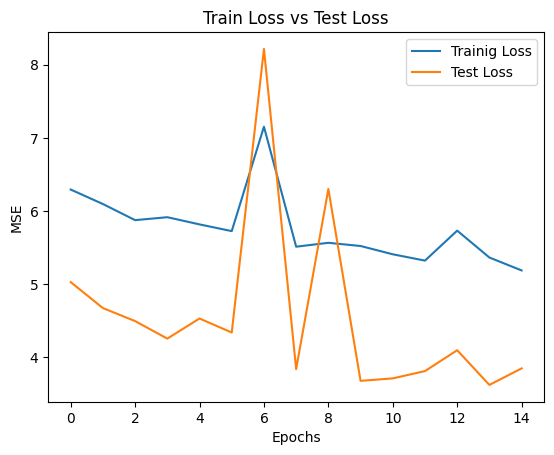

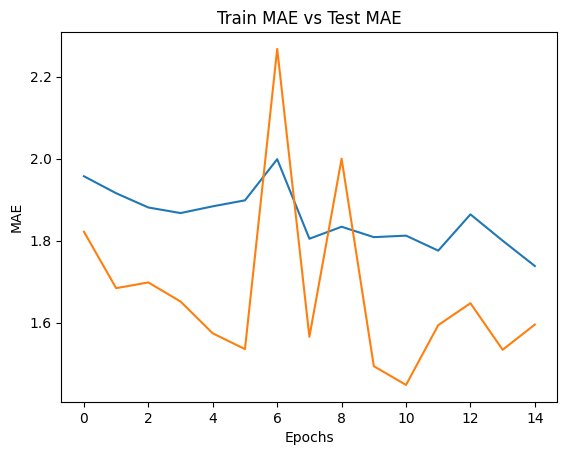

In [ ]:
import matplotlib.pyplot as plt

train_loss_hist = []
train_mae_hist = []
test_loss_hist = []
test_mae_hist = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    mae_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelA(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        mae = nn.L1Loss()(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
        mae_hist_train += mae.item()

    if epoch % log_epochs==0:
        train_loss = loss_hist_train/len(train_dl)
        train_mae = mae_hist_train/len(train_dl)
        test_pred = modelA(x_val.float())[:, 0]
        test_loss = loss_fn(test_pred, y_val).item()
        test_mae = nn.L1Loss()(test_pred, y_val).item()

        print(f'Epoch {epoch}  Train Loss {train_loss:.4f}  Train MAE {train_mae:.4f}  Val Loss {test_loss:.4f}  Val MAE {test_mae:.4f}')

        train_loss_hist.append(train_loss)
        train_mae_hist.append(train_mae)
        test_loss_hist.append(test_loss)
        test_mae_hist.append(test_mae)

plt.plot(train_loss_hist, label= 'Trainig Loss' )
plt.plot(test_loss_hist,label= 'Test Loss' )
plt.title('Train Loss vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(train_mae_hist, label = 'Train MAE')
plt.plot(test_mae_hist, label = 'Test MAE')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()


In [ ]:
pathA = 'Predicting_fuel_A.pt'
torch.save(modelA.state_dict(), pathA)

## We can see an improvemnt im MSE and MAE

# **The Second architecture :**
## The values of the hyper-parameters:
### Hidden units = [8,6,4]
### Output size = 1
### Activation function = ReLU
### Learning rate = 0.001
### Loss function = MSELoss
### Optimizer = SGD
### Batch size = 16
### Number of epoch = 300
### We increased the batch size to 16 and change the activation function to ReLU, we think it make a little bit of improvement.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 16
torch.manual_seed(3)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_ds = TensorDataset(x_val, y_val)
val_dl = DataLoader(val_ds, batch_size=batch_size)

In [ ]:
hidden_units = [8,6,4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

modelB = nn.Sequential(*all_layers)

modelB

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(modelB.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(3)
num_epochs = 300
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelB(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')


Epoch 0  Loss 578.5869
Epoch 20  Loss 9.0373
Epoch 40  Loss 7.9945
Epoch 60  Loss 8.1864
Epoch 80  Loss 7.3227
Epoch 100  Loss 7.6955
Epoch 120  Loss 6.6073
Epoch 140  Loss 6.7680
Epoch 160  Loss 6.9545
Epoch 180  Loss 5.9405
Epoch 200  Loss 5.7655
Epoch 220  Loss 5.6698
Epoch 240  Loss 6.0886
Epoch 260  Loss 5.7993
Epoch 280  Loss 5.9946


In [ ]:
with torch.no_grad():
    pred = modelB(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 8.6605
Test MAE: 1.9485


Epoch 0  Train Loss 5.7837  Train MAE 1.8002  Val Loss 4.3855  Val MAE 1.6166
Epoch 20  Train Loss 6.4121  Train MAE 1.8930  Val Loss 4.4014  Val MAE 1.6336
Epoch 40  Train Loss 6.3651  Train MAE 1.8758  Val Loss 5.7049  Val MAE 1.9867
Epoch 60  Train Loss 6.1112  Train MAE 1.8294  Val Loss 4.0463  Val MAE 1.6207
Epoch 80  Train Loss 5.8423  Train MAE 1.8272  Val Loss 4.8121  Val MAE 1.8289
Epoch 100  Train Loss 5.4385  Train MAE 1.7385  Val Loss 4.0163  Val MAE 1.5901
Epoch 120  Train Loss 5.5417  Train MAE 1.7945  Val Loss 4.0347  Val MAE 1.5762
Epoch 140  Train Loss 5.6476  Train MAE 1.8100  Val Loss 4.2922  Val MAE 1.6326
Epoch 160  Train Loss 5.4103  Train MAE 1.7423  Val Loss 4.0943  Val MAE 1.6885
Epoch 180  Train Loss 6.1980  Train MAE 1.8502  Val Loss 4.5176  Val MAE 1.6662
Epoch 200  Train Loss 5.6062  Train MAE 1.8134  Val Loss 4.1904  Val MAE 1.6801
Epoch 220  Train Loss 5.7220  Train MAE 1.7869  Val Loss 3.9743  Val MAE 1.6003
Epoch 240  Train Loss 5.7563  Train MAE 1.7876

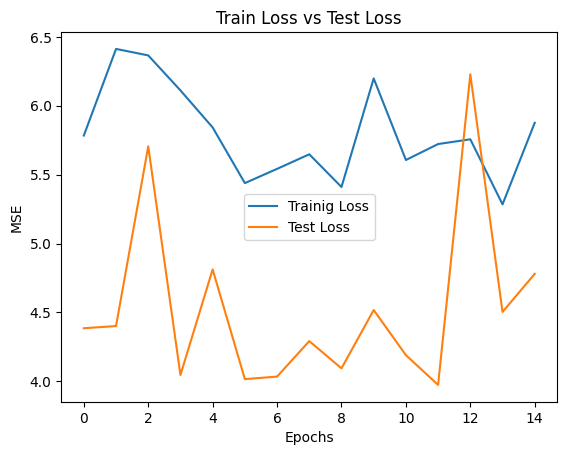

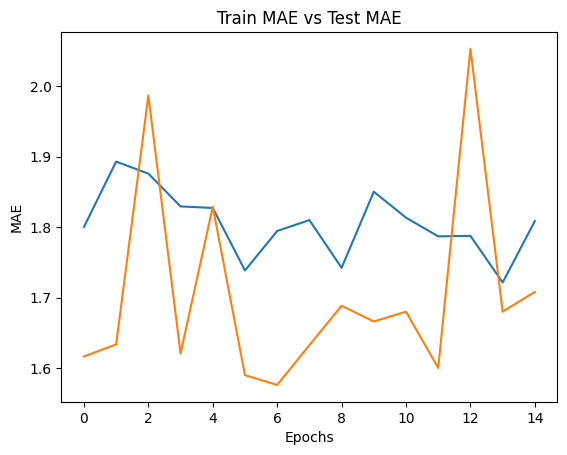

In [ ]:
import matplotlib.pyplot as plt

train_loss_hist = []
train_mae_hist = []
test_loss_hist = []
test_mae_hist = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    mae_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelB(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        mae = nn.L1Loss()(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
        mae_hist_train += mae.item()

    if epoch % log_epochs==0:
        train_loss = loss_hist_train/len(train_dl)
        train_mae = mae_hist_train/len(train_dl)
        test_pred = modelB(x_val.float())[:, 0]
        test_loss = loss_fn(test_pred, y_val).item()
        test_mae = nn.L1Loss()(test_pred, y_val).item()

        print(f'Epoch {epoch}  Train Loss {train_loss:.4f}  Train MAE {train_mae:.4f}  Val Loss {test_loss:.4f}  Val MAE {test_mae:.4f}')

        train_loss_hist.append(train_loss)
        train_mae_hist.append(train_mae)
        test_loss_hist.append(test_loss)
        test_mae_hist.append(test_mae)

plt.plot(train_loss_hist, label= 'Trainig Loss' )
plt.plot(test_loss_hist,label= 'Test Loss' )
plt.title('Train Loss vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(train_mae_hist, label = 'Train MAE')
plt.plot(test_mae_hist, label = 'Test MAE')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
pathB = 'Predicting_fuel_B.pt'
torch.save(modelB.state_dict(), pathB)

### As we can see the changes are not imporved the model and make it a little less accurate.

# **The Third architecture :**
## The values of the hyper-parameters:
### Hidden units = [8,6,6,4]
### Output size = 1
### Activation function =ReLU
### Learning rate = 0.001
### Loss function = MSELoss
### Optimizer = SGD
### Batch size = 8
### Number of epoch = 300
### We add one more layer to the model and we brought the batch size to the size in the first architecture.  we think it well be better than the second architecture.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(4)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_ds = TensorDataset(x_val, y_val)
val_dl = DataLoader(val_ds, batch_size=batch_size)

In [ ]:
hidden_units = [8,6,6,4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.Sigmoid())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

modelC = nn.Sequential(*all_layers)

modelC

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=8, out_features=6, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=6, out_features=6, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=6, out_features=4, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(modelC.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(4)
num_epochs = 300
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelC(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')


Epoch 0  Loss 526.0855
Epoch 20  Loss 59.7361
Epoch 40  Loss 57.3308
Epoch 60  Loss 57.6104
Epoch 80  Loss 58.2066
Epoch 100  Loss 57.4152
Epoch 120  Loss 57.0957
Epoch 140  Loss 56.7247
Epoch 160  Loss 59.7617
Epoch 180  Loss 24.1202
Epoch 200  Loss 13.6075
Epoch 220  Loss 10.5593
Epoch 240  Loss 9.3471
Epoch 260  Loss 8.6510
Epoch 280  Loss 8.3069


In [ ]:
with torch.no_grad():
    pred = modelC(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 7.8983
Test MAE: 1.9471


Epoch 0  Train Loss 8.0700  Train MAE 2.1731  Val Loss 6.7112  Val MAE 2.1139
Epoch 20  Train Loss 8.0180  Train MAE 2.1682  Val Loss 6.7790  Val MAE 2.1356
Epoch 40  Train Loss 6.9154  Train MAE 2.0096  Val Loss 5.3560  Val MAE 1.9289
Epoch 60  Train Loss 6.5171  Train MAE 1.9788  Val Loss 5.4027  Val MAE 1.8358
Epoch 80  Train Loss 6.7628  Train MAE 2.0208  Val Loss 6.5222  Val MAE 2.0646
Epoch 100  Train Loss 6.4243  Train MAE 1.9751  Val Loss 13.7841  Val MAE 2.9682
Epoch 120  Train Loss 6.0281  Train MAE 1.9355  Val Loss 6.1854  Val MAE 1.9964
Epoch 140  Train Loss 6.2667  Train MAE 1.9466  Val Loss 4.1884  Val MAE 1.6350
Epoch 160  Train Loss 5.7691  Train MAE 1.8692  Val Loss 5.6129  Val MAE 1.8826
Epoch 180  Train Loss 5.6488  Train MAE 1.8686  Val Loss 5.2201  Val MAE 1.8364
Epoch 200  Train Loss 5.5545  Train MAE 1.8624  Val Loss 3.8044  Val MAE 1.5696
Epoch 220  Train Loss 5.3938  Train MAE 1.7702  Val Loss 3.7540  Val MAE 1.5502
Epoch 240  Train Loss 5.3656  Train MAE 1.844

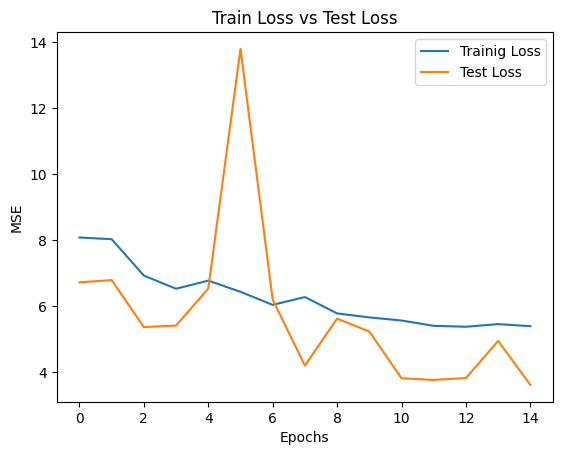

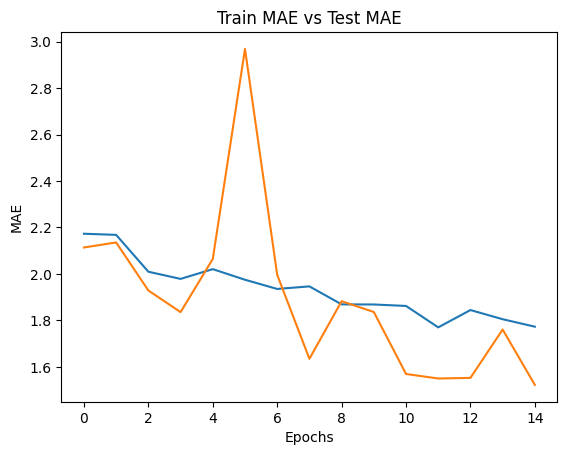

In [ ]:
import matplotlib.pyplot as plt

train_loss_hist = []
train_mae_hist = []
test_loss_hist = []
test_mae_hist = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    mae_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = modelC(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        mae = nn.L1Loss()(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
        mae_hist_train += mae.item()

    if epoch % log_epochs==0:
        train_loss = loss_hist_train/len(train_dl)
        train_mae = mae_hist_train/len(train_dl)
        test_pred = modelC(x_val.float())[:, 0]
        test_loss = loss_fn(test_pred, y_val).item()
        test_mae = nn.L1Loss()(test_pred, y_val).item()

        print(f'Epoch {epoch}  Train Loss {train_loss:.4f}  Train MAE {train_mae:.4f}  Val Loss {test_loss:.4f}  Val MAE {test_mae:.4f}')

        train_loss_hist.append(train_loss)
        train_mae_hist.append(train_mae)
        test_loss_hist.append(test_loss)
        test_mae_hist.append(test_mae)

plt.plot(train_loss_hist, label= 'Trainig Loss' )
plt.plot(test_loss_hist,label= 'Test Loss' )
plt.title('Train Loss vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(train_mae_hist, label = 'Train MAE')
plt.plot(test_mae_hist, label = 'Test MAE')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()


In [ ]:
pathC = 'Predicting_fuel_C.pt'
torch.save(modelC.state_dict(), pathC)

## The increasing of the layers make a good improvement to the model, and we got a good results in MSE and MAE.

# Loading the best model.

In [ ]:
model = modelC
model.load_state_dict(torch.load(pathC))
model.eval()


Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=8, out_features=6, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=6, out_features=6, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=6, out_features=4, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=4, out_features=1, bias=True)
)

Epoch 0  Train Loss 5.4941  Test Loss 14.7814  Test MAE 2.8375
Epoch 20  Train Loss 5.1670  Test Loss 8.5986  Test MAE 2.0149
Epoch 40  Train Loss 5.5339  Test Loss 8.2403  Test MAE 1.9546
Epoch 60  Train Loss 4.9868  Test Loss 9.1944  Test MAE 2.0771
Epoch 80  Train Loss 5.0125  Test Loss 10.0561  Test MAE 2.1799
Epoch 100  Train Loss 5.0351  Test Loss 9.6411  Test MAE 2.1243
Epoch 120  Train Loss 4.7263  Test Loss 8.4815  Test MAE 1.9498
Epoch 140  Train Loss 5.5633  Test Loss 12.5067  Test MAE 2.5387
Epoch 160  Train Loss 4.7146  Test Loss 8.4376  Test MAE 1.9339
Epoch 180  Train Loss 4.6301  Test Loss 9.6651  Test MAE 2.1213
Epoch 200  Train Loss 4.6821  Test Loss 9.1528  Test MAE 2.0282
Epoch 220  Train Loss 4.5332  Test Loss 11.9578  Test MAE 2.4067
Epoch 240  Train Loss 4.5522  Test Loss 8.6630  Test MAE 1.9312
Epoch 260  Train Loss 4.6393  Test Loss 9.1043  Test MAE 1.9867
Epoch 280  Train Loss 4.4797  Test Loss 8.5772  Test MAE 1.9473


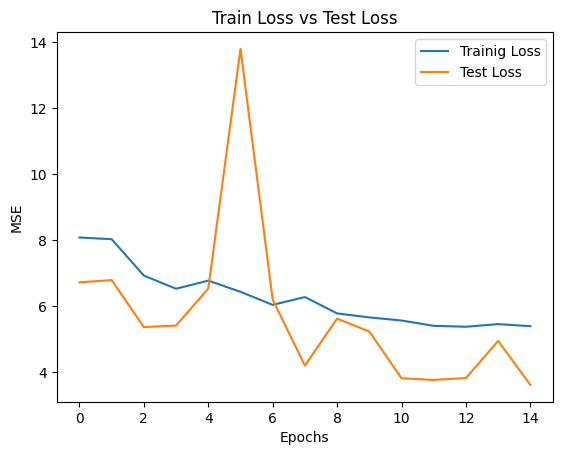

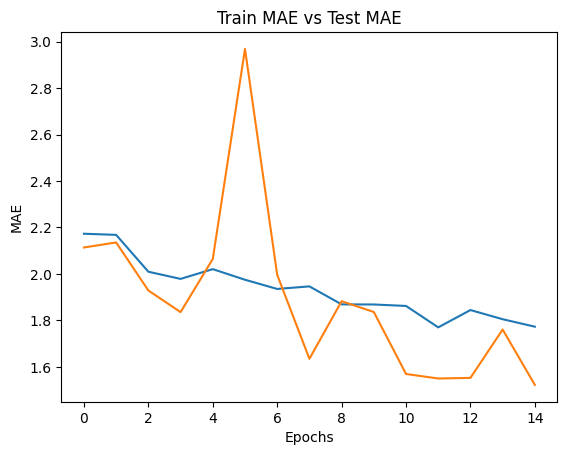

In [ ]:
train_losses = []
test_losses = []
test_maes = []
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    train_losses.append(loss_hist_train/len(train_dl))

    if epoch % log_epochs==0:
        with torch.no_grad():
            pred = model(x_test.float())[:, 0]
            test_loss = loss_fn(pred, y_test)
            test_mae = nn.L1Loss()(pred, y_test)
            test_losses.append(test_loss)
            test_maes.append(test_mae)
            print(f'Epoch {epoch}  Train Loss {train_losses[-1]:.4f}  Test Loss {test_loss:.4f}  Test MAE {test_mae:.4f}')

plt.plot(train_loss_hist, label= 'Trainig Loss' )
plt.plot(test_loss_hist,label= 'Test Loss' )
plt.title('Train Loss vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(train_mae_hist, label = 'Train MAE')
plt.plot(test_mae_hist, label = 'Test MAE')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()